In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('institutions_papers_years.csv')

In [4]:
def plot_cumulative_publications(df, years, top_n=10):
    """
    Plots the cumulative number of publications for the top N countries up to each year.

    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year of publication' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on cumulative publications.
    """
    # Ensure 'Year of publication' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

    # Sort the pivot table by year to ensure correct cumulative sum
    pivot_df = pivot_df.sort_index()

    # Compute the cumulative sum over the years
    cumulative_df = pivot_df.cumsum()

    # Select the top N countries based on the latest cumulative counts
    top_countries = cumulative_df.iloc[-1].nlargest(top_n).index

    # Filter the cumulative dataframe to include only the top N countries
    cumulative_top_df = cumulative_df[top_countries]

    # Plotting
    plt.figure(figsize=(14, 8))
    
    for country in top_countries:
        plt.plot(cumulative_top_df.index, cumulative_top_df[country], marker='o', label=country)
    
    plt.title('Cumulative Publications by Top Countries Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Cumulative Number of Publications', fontsize=14)
    plt.legend(title='Country', fontsize=12, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
def plot_publications(df, years, top_n=10):
    """
    Plots the number of publications per year for the top N countries.

    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year of publication' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on total publications.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

    # Select the top N countries based on total publications
    top_countries = pivot_df.sum().nlargest(top_n).index

    # Filter the pivot dataframe to include only the top N countries
    top_df = pivot_df[top_countries]

    # Plotting
    plt.figure(figsize=(14, 8))
    
    for country in top_countries:
        plt.plot(top_df.index, top_df[country], marker='o', label=country)
    
    plt.title('Number of Publications by Top Countries Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Publications', fontsize=14)
    plt.legend(title='Country', fontsize=12, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
def plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='trailing'):
    """
    Plots the smoothed number of publications per year for the top N countries using different smoothing methods.

    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on total publications.
    - window (int): The window size for the moving average smoothing.
    - smoothing (str): The smoothing method to use: 'trailing', 'centered', or 'gaussian'.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

    # Select the top N countries based on total publications
    top_countries = pivot_df.sum().nlargest(top_n).index

    # Filter the pivot dataframe to include only the top N countries
    top_df = pivot_df[top_countries]

    # Apply smoothing based on the specified method
    if smoothing == 'trailing':
        smoothed_df = top_df.rolling(window=window, min_periods=1).mean()
    elif smoothing == 'centered':
        smoothed_df = top_df.rolling(window=window, min_periods=1, center=True).mean()
    elif smoothing == 'gaussian':
        smoothed_df = top_df.rolling(window=window, min_periods=1, win_type='gaussian').mean(std=window / 2)
    else:
        raise ValueError("Invalid smoothing method. Choose 'trailing', 'centered', or 'gaussian'.")

    # Plotting
    plt.figure(figsize=(14, 8))
    
    for country in top_countries:
        plt.plot(smoothed_df.index, smoothed_df[country], marker='o', label=country)
    
    plt.title(f'Smoothed Number of Publications by Top Countries Over Time ({smoothing.capitalize()} Smoothing)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Publications', fontsize=14)
    plt.legend(title='Country', fontsize=12, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()


In [22]:
years = list(range(2013, 2024))

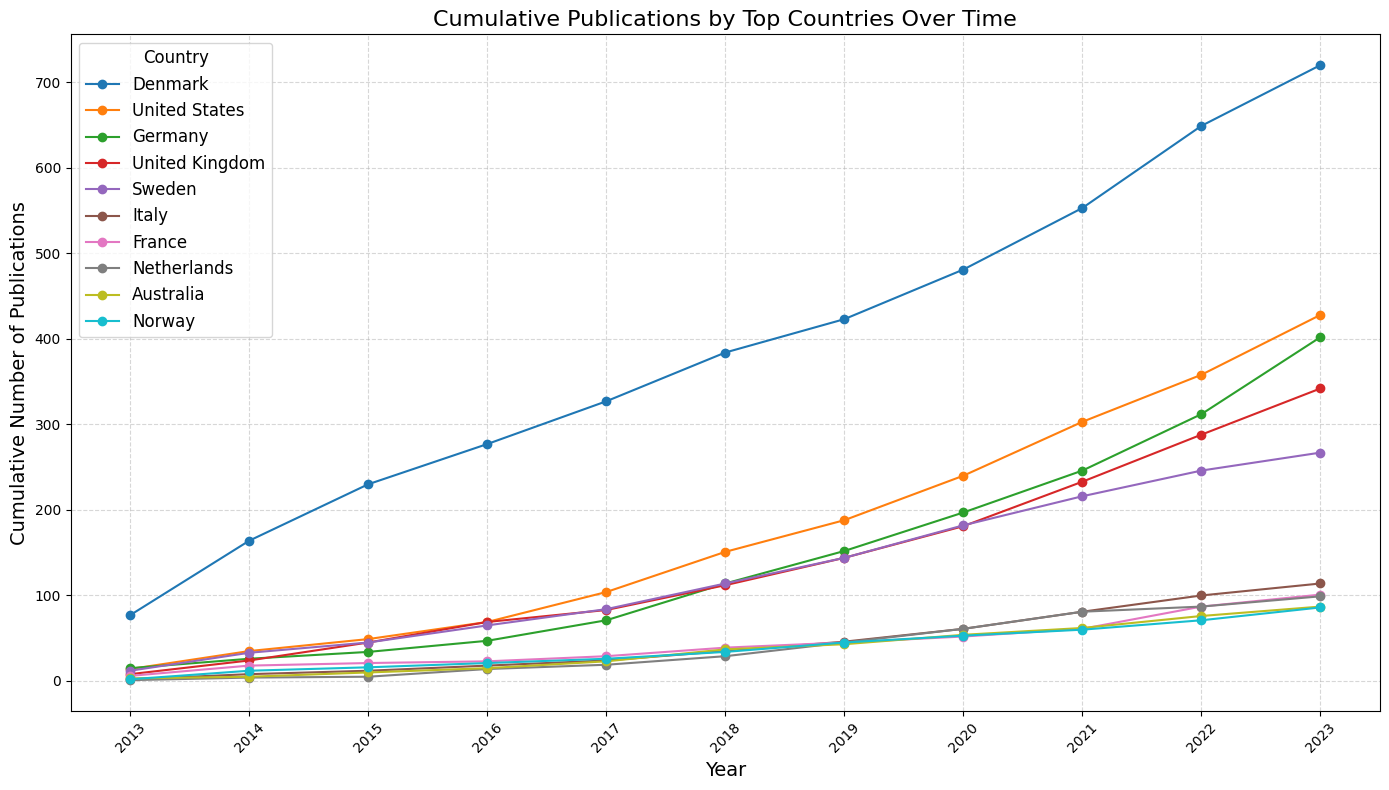

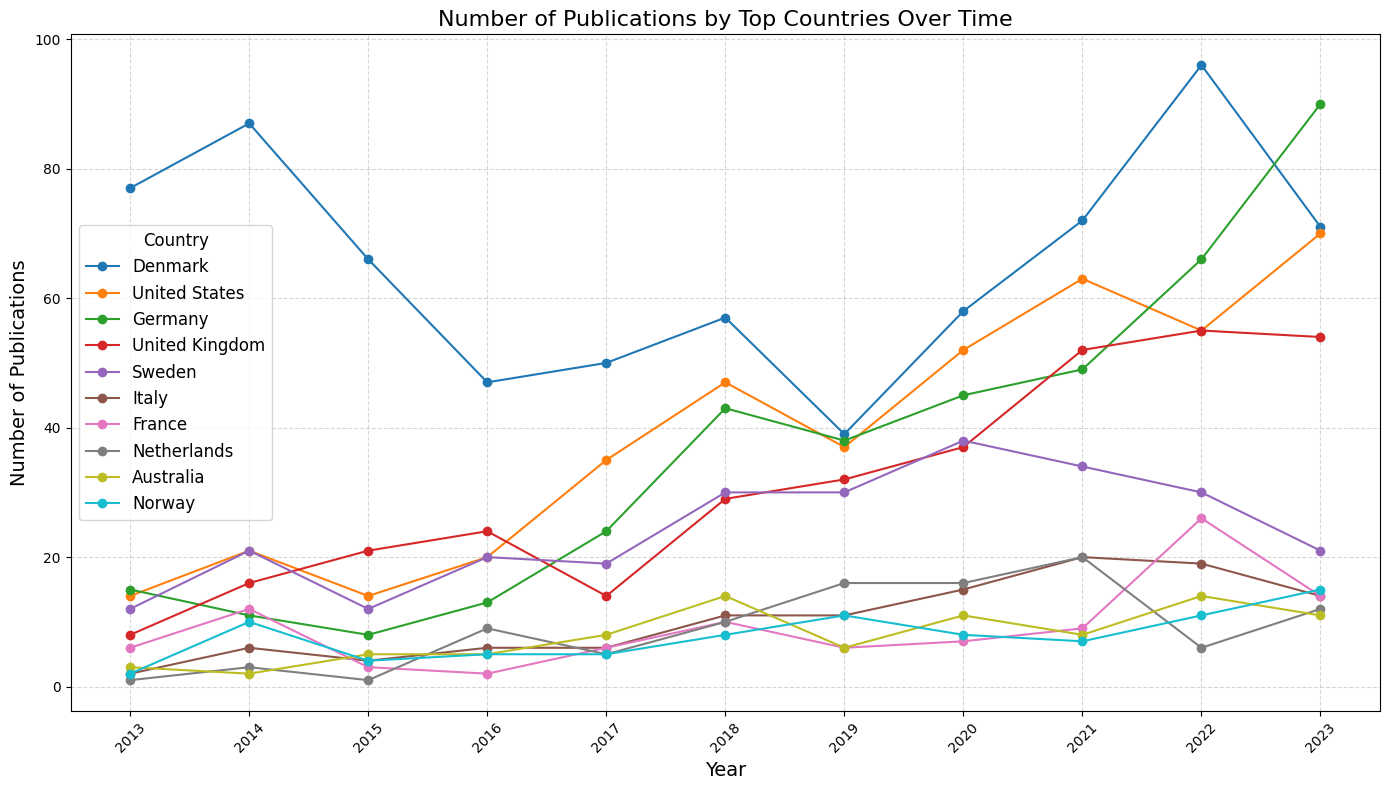

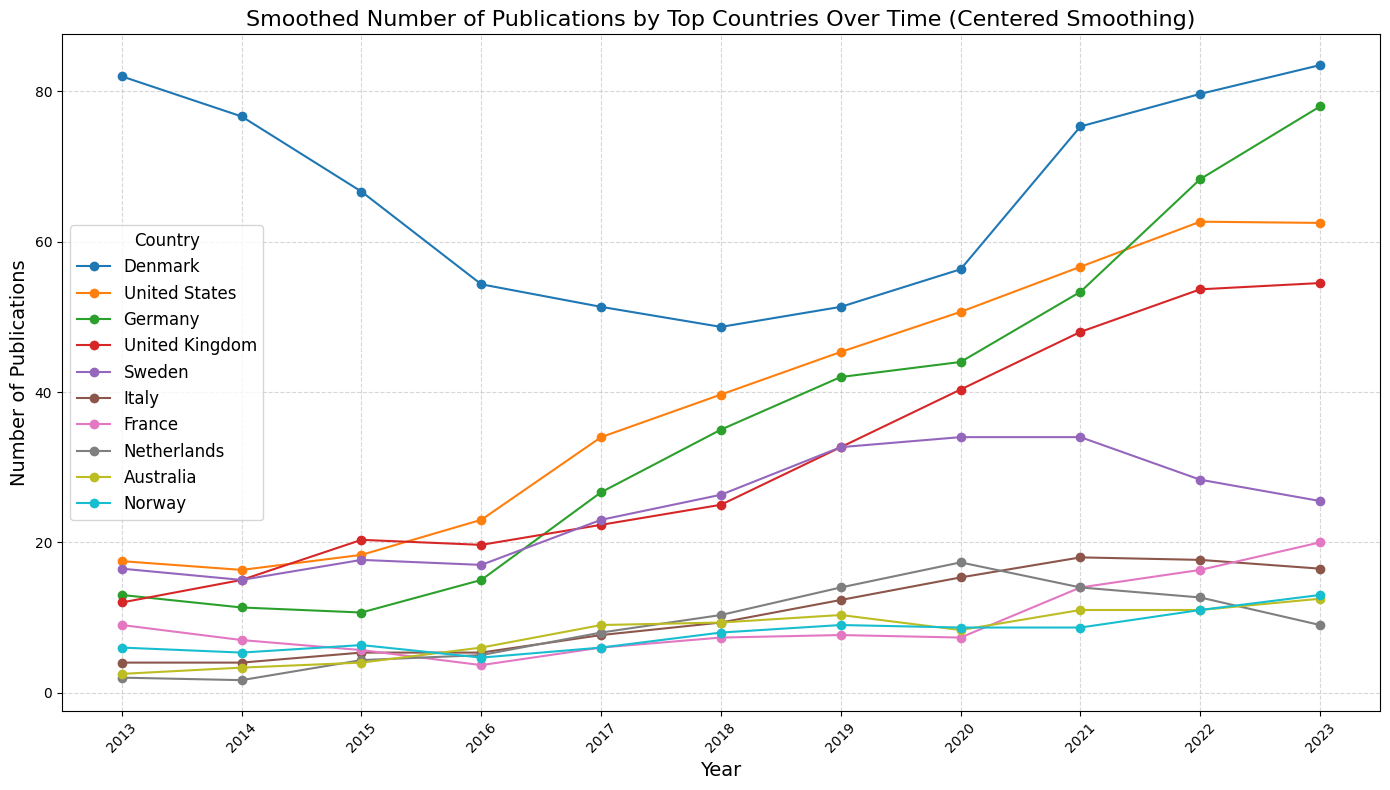

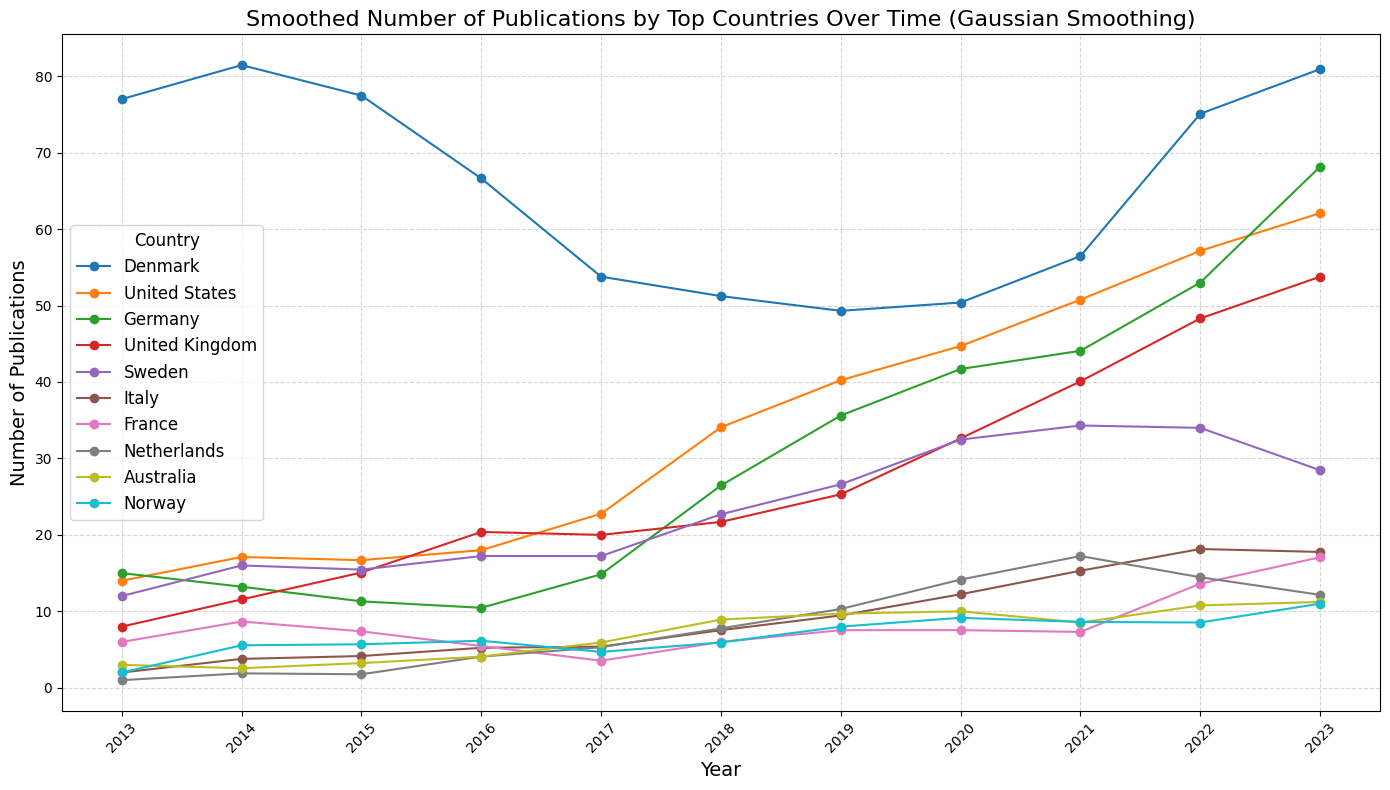

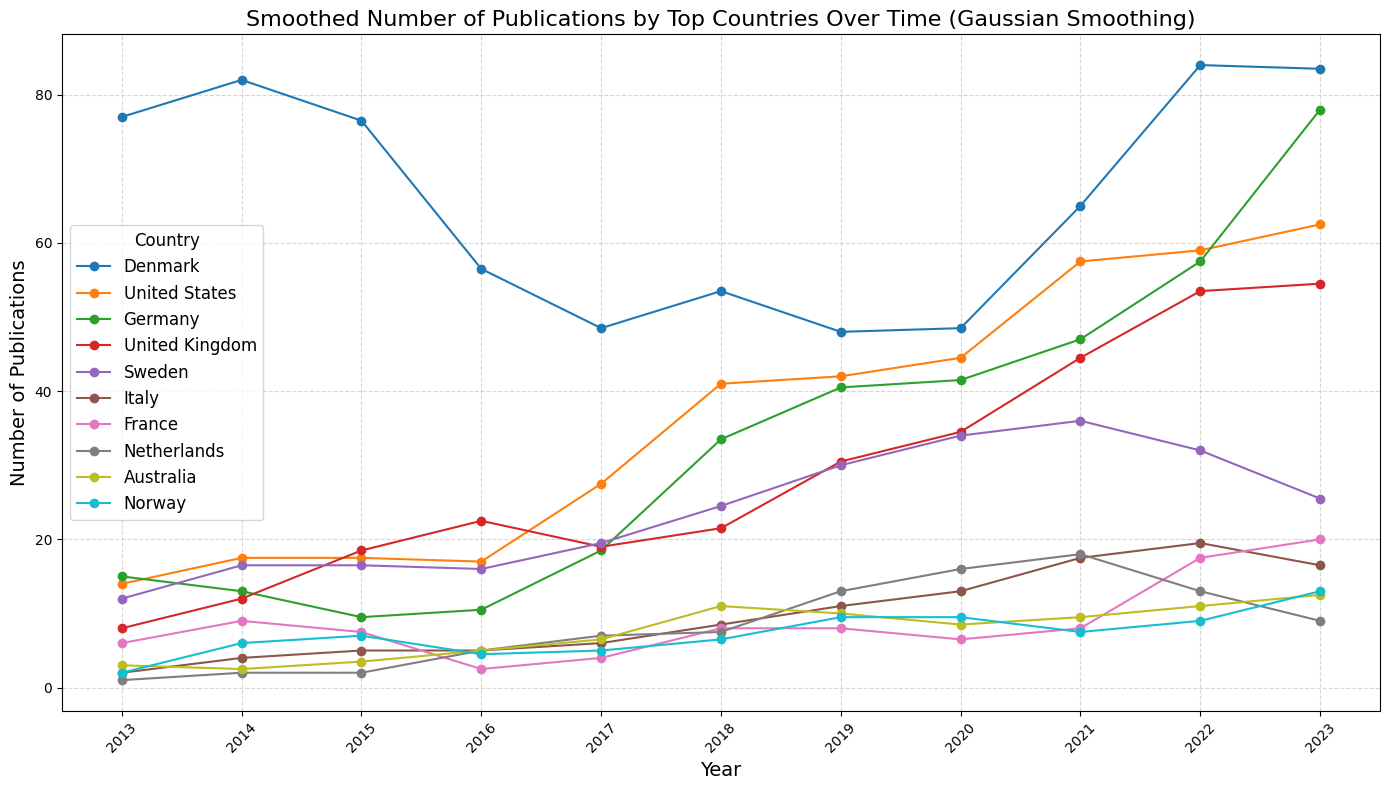

In [24]:
a = plot_cumulative_publications(df, years, top_n=10)
plot_publications(df, years, top_n=10)
plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='centered')
plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='gaussian')
plot_publications_smoothing(df, years, top_n=10, window=2, smoothing='gaussian')